#Description
This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.

Your task is to execute the process for proactive detection of fraud while answering following questions.

1- Data cleaning including missing values, outliers and multi-collinearity.

2- Describe your fraud detection model in elaboration.

3- How did you select variables to be included in the model?

4- Demonstrate the performance of the model by using best set of tools.

5- What are the key factors that predict fraudulent customer?

6- Do these factors make sense? If yes, How? If not, How not?

7- What kind of prevention should be adopted while company update its infrastructure?

8- Assuming these actions have been implemented, how would you determine if they work?


## Importing important libraries


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [8]:
df= pd.read_csv("/content/drive/MyDrive/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape


(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# Missing values

df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
# There are no missing values in our data

## EDA


### Univariate Analysis


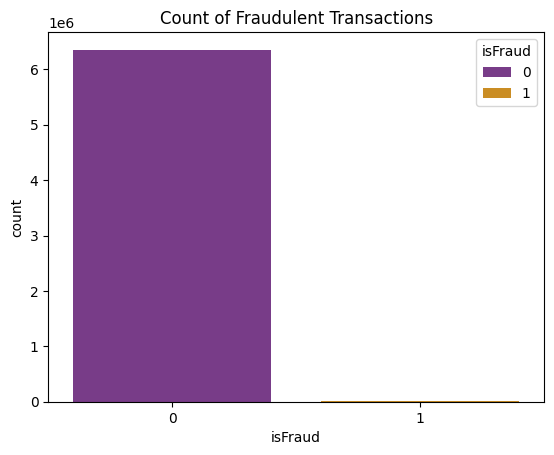

Non-fraud transactions: 99.87%
Fraud transactions: 0.13%


In [9]:
sns.countplot(x='isFraud', data=df, palette='CMRmap', hue='isFraud')
plt.title('Count of Fraudulent Transactions')
plt.show()
print('Non-fraud transactions: {}%'.format(round(df.isFraud.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.isFraud.value_counts()[1]/len(df)*100.0,2)))

In [10]:
# Here it can be seen that data is highly imbalanced.

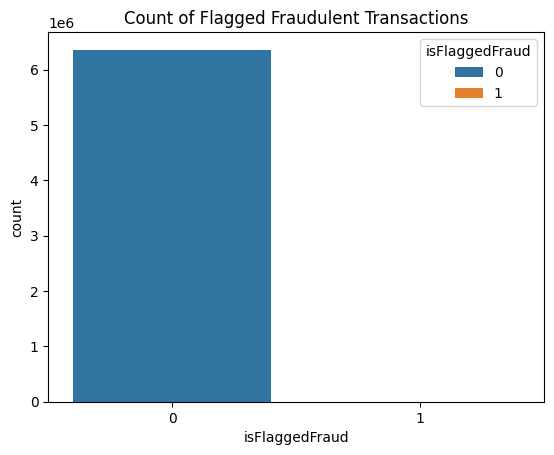

Non-flaggedfraud transactions: 99.999749%
Flaggedfraud transactions: 0.000251%


In [11]:
sns.countplot(x='isFlaggedFraud', data=df, hue='isFlaggedFraud')
plt.title('Count of Flagged Fraudulent Transactions')
plt.show()
print('Non-flaggedfraud transactions: {}%'.format(round(df.isFlaggedFraud.value_counts()[0]/len(df)*100.0,6)))
print('Flaggedfraud transactions: {}%'.format(round(df.isFlaggedFraud.value_counts()[1]/len(df)*100.0,6)))

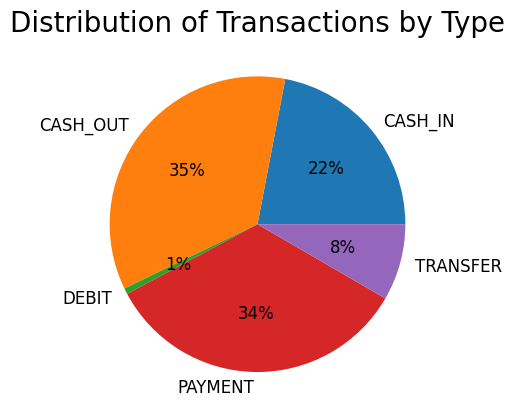

In [12]:
df.groupby('type').size().plot(kind='pie', autopct='%.0f%%', textprops={'fontsize': 12})
plt.title('Distribution of Transactions by Type', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Distribution of Amount')

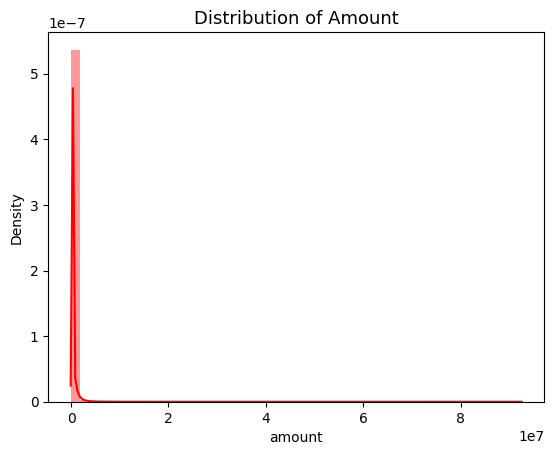

In [13]:
ax1=sns.distplot(df['amount'], color='r')
ax1.set_title('Distribution of Amount', fontsize=13)

Text(0.5, 1.0, 'Distribution of Time')

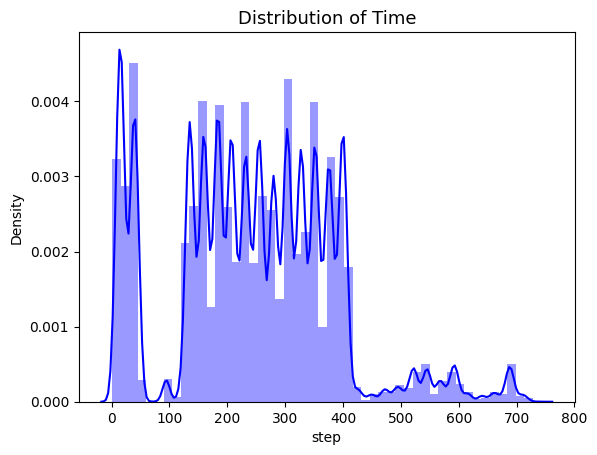

In [14]:
# step distribution (1 step = 1 hour)
ax2=sns.distplot(df['step'], color='b')
ax2.set_title('Distribution of Time', fontsize=13)

### Bivariate Analysis


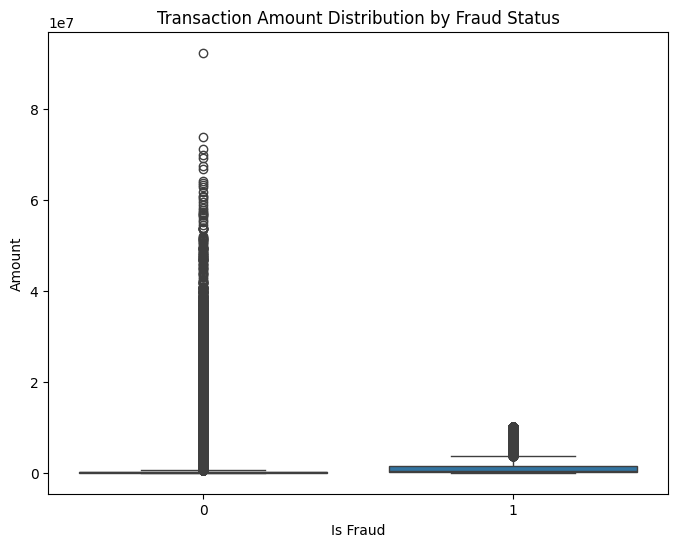

In [15]:
# Numerical vs Categorical

# Boxplot for 'amount' by 'isFraud'
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()


In [16]:
# Categorical vs Categorical

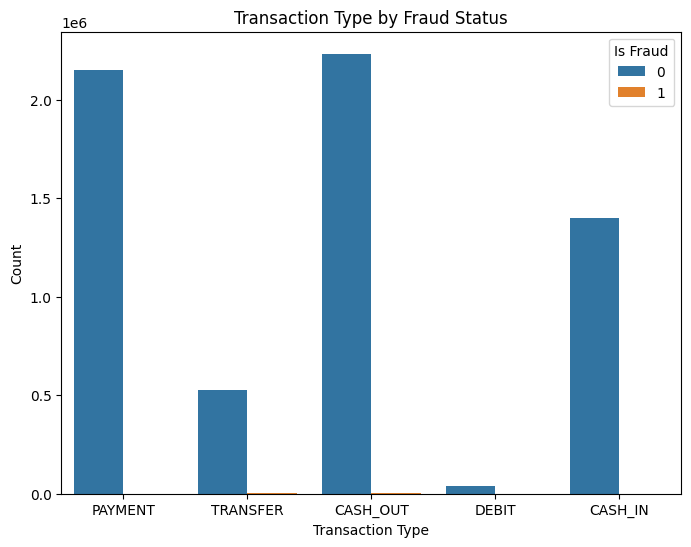

In [17]:
# Countplot for transaction types by fraud status
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

### Multivariate Analysis


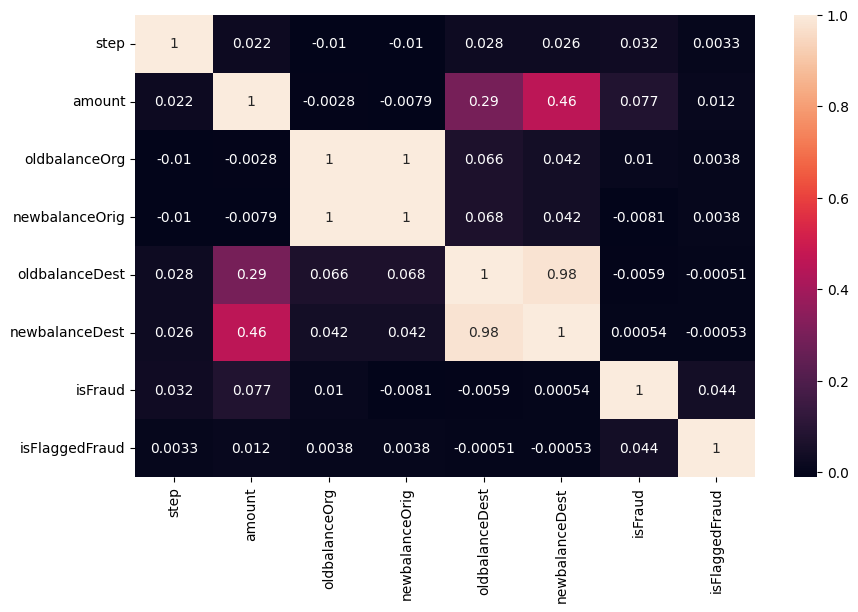

In [18]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
corr = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
# Here it is concluded that oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest,step are not very much
# correlated with target variable

# Data Preprocessing


In [17]:
#making copy of original data
new_df = df.copy()

In [21]:
# Here I am not doing Standardization beacuse data is highly imbalaced and
#for that matter I am not going to use distance based Algo.

## Encoding


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [23]:
# dropping column step, nameOrig and nameDest as they don't provide much information about fraud transactions

In [19]:
new_df= new_df.drop(['nameOrig', 'nameDest', 'step'], axis=1)

In [20]:
# Checking how many attributes are dtype: object

CatList = new_df.select_dtypes(include = "object").columns
print (CatList)

Index(['type'], dtype='object')


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in CatList:
    new_df[i] = le.fit_transform(new_df[i].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB
None


In [27]:
# Checking Multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,type,1.103849
1,amount,4.031381
2,oldbalanceOrg,547.091828
3,newbalanceOrig,548.911892
4,oldbalanceDest,71.855502
5,newbalanceDest,83.730025
6,isFraud,1.186214
7,isFlaggedFraud,1.002528


In [29]:
# we can see that columns oldbalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest has VIF
# way higher than 5 hence we will combine these columns

In [23]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)


#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,1.092685
1,amount,3.760248
2,isFraud,1.176099
3,isFlaggedFraud,1.002478
4,Actual_amount_orig,1.212137
5,Actual_amount_dest,3.692456


<Axes: >

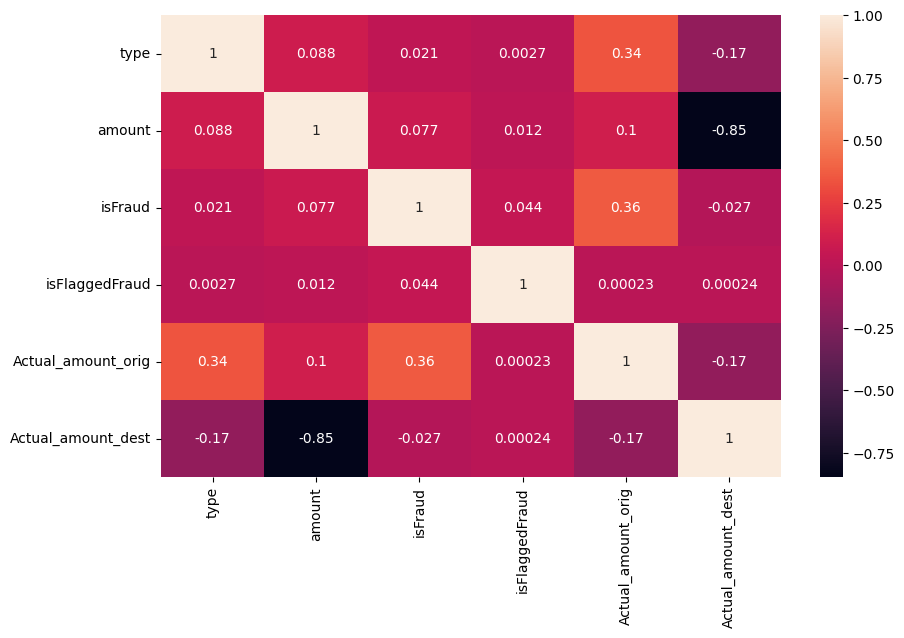

In [31]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [24]:
## train-test split

from sklearn.model_selection import train_test_split
X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handling Imbalaced data using SMOTE


In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
# as the data was highly imbalaced hence I used SMOTE technique to add some random rows to make the data balanced.

In [26]:
legit = len(y_res == 0)
fraud = len(y_res == 1)
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

In [36]:
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  8896112
Number of Fraud transactions:  8896112
Percentage of Legit transactions: 50.0000 %
Percentage of Fraud transactions: 50.0000 %


# Model Building


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Hyperparameter Tuning


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### Decision Tree classifier


In [39]:

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),

              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_res,y_res)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [40]:
print (f'Train Accuracy - : {tree_cv.score(X_res,y_res):.3f}')
print (f'Test Accuracy - : {tree_cv.score(X_test,y_test):.3f}')

Train Accuracy - : 0.984
Test Accuracy - : 0.972


In [41]:
#Getting prediction
y_pred_dt= tree_cv.predict(X_test)

### Random Tree Classifier


In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [43]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [28]:
# Instantiate a Random Forest classifier: rf_Model
rf_Model = RandomForestClassifier()

In [50]:
# Instantiate the RandomizedSearchCV object: rf_RandomGrid
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid,
                                    verbose=2, n_jobs = 4)

In [51]:
# Fit it to the data
rf_RandomGrid.fit(X_res, y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_RandomGrid.best_params_))
print("Best score is {}".format(rf_RandomGrid.best_score_))

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

In [ ]:
# Getting prediction
y_pred_rf= rf_RandomGrid.predict(X_test)

# Checking Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

In [ ]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.



# Q/A

3- How did you select variables to be included in the model?
Ans- Variables were selected on the basis of correlation with target variable and checking multicollinearity

5-What are the key factors that predict fraudulent customer?

Ans- -Large, unusual transactions, especially if they deviate significantly from a customer's typical spending behavior.
- A sudden increase in transaction frequency, particularly across different locations or at odd hours.
- The use of non-traditional payment methods (e.g., virtual cards, cryptocurrencies) can signal fraud, especially if they are uncommon for a given customer.
- Alerts raised by earlier transaction reviews, such as transactions that exceed set thresholds

6- Do these factors make sense? If yes, How? If not, How not?

Ans- Yes, these factors make sense. They are based on the understanding that fraudulent behavior typically deviates from normal customer actions


7- What kind of prevention should be adopted while company update its infrastructure?

Ans- To prevent fraudulent transactions during an infrastructure update, companies should implement real-time monitoring and alerts for suspicious activities while maintaining a backup fraud detection system. Communicate update plans to stakeholders and provide training on interim processes. Finally, conduct a post-update audit to ensure fraud detection systems are operational and no anomalies occurred during the transition. These measures minimize risks and maintain fraud prevention continuity.

8-Assuming these actions have been implemented, how would you determine if they work?

Ans- To determine if the implemented actions are effective, monitor key performance metrics such as the fraud detection rate (precision, recall, and F1-score), false positives, and false negatives. Compare pre- and post-update transaction logs to ensure no fraudulent transactions bypassed detection. Use historical and simulated fraud scenarios to validate system performance and verify that backup systems maintained accuracy during the update. Analyze real-time monitoring data for any anomalies and assess stakeholder feedback for usability and effectiveness